In [1]:
import numpy as np
import energyflow as ef
import ROOT
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import time
import pickle
import os
import itertools
import csv

Welcome to JupyROOT 6.18/00


In [2]:
jetm_lb = [ 2, 
            2, 3, 
            2, 3, 3, 4, 4, 
            2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 
            2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6]
graphs = [[(0,1)], 
          [(0,1),(0,1)], [(0,1),(0,2)], 
          [(0,1),(0,1),(0,1)], [(0,1),(1,2),(0,2)], [(0,1),(0,1),(0,2)], 
          [(0,1),(0,2),(0,3)], [(0,1),(1,2),(0,3)], 
          [(0,1),(0,1),(0,1),(0,1)], [(0,1),(0,1),(0,2),(0,2)], [(0,1),(1,2),(1,2),(0,2)], 
          [(0,1),(0,1),(0,1),(0,2)], [(0,1),(1,2),(2,3),(3,0)], [(0,1),(0,1),(0,2),(0,3)], 
          [(0,1),(0,1),(0,2),(1,3)], [(0,1),(1,2),(2,3),(3,1)], [(0,1),(0,1),(0,2),(2,3)], 
          [(0,1),(0,2),(0,3),(0,4)], [(0,1),(0,2),(0,3),(1,4)], [(0,1),(0,2),(1,3),(2,4)], 
          [(0,1),(0,1),(0,1),(0,1),(0,1)],
          [(0,1),(0,2),(1,2),(1,2),(1,2)], [(0,1),(0,1),(0,2),(1,2),(1,2)], 
          [(0,1),(0,1),(0,1),(0,1),(0,2)], [(0,1),(0,1),(0,1),(0,2),(0,2)], 
          [(0,1),(0,2),(2,1),(3,1),(3,2)], [(0,1),(0,1),(0,1),(0,3),(0,2)], 
          [(0,1),(0,1),(0,3),(0,2),(0,2)], [(0,1),(0,1),(0,1),(0,2),(1,3)],
          [(0,1),(0,1),(2,1),(2,3),(3,1)], [(0,1),(2,1),(3,1),(3,2),(3,2)],
          [(0,1),(2,1),(3,1),(3,2),(1,2)], [(0,1),(0,2),(0,2),(1,3),(1,3)],
          [(0,1),(2,1),(3,2),(3,0),(1,2)], [(0,1),(0,1),(0,2),(0,2),(1,3)],
          [(0,1),(0,2),(0,2),(0,2),(1,3)], [(0,1),(1,2),(2,3),(3,4),(4,0)],
          [(0,1),(0,1),(0,2),(0,3),(0,4)], [(0,1),(0,2),(1,2),(0,3),(0,4)],
          [(0,1),(0,1),(1,2),(0,3),(0,4)], [(0,1),(1,2),(1,2),(0,3),(0,4)],
          [(0,1),(2,1),(3,1),(3,2),(3,4)], [(0,1),(0,2),(1,3),(3,2),(3,4)],
          [(0,1),(0,2),(1,2),(0,3),(3,4)], [(0,1),(0,2),(0,2),(0,3),(1,4)],
          [(0,1),(0,1),(1,2),(0,3),(3,4)], [(0,1),(1,2),(1,2),(0,3),(3,4)],
          [(0,1),(0,2),(0,3),(0,4),(0,5)], [(0,1),(0,2),(0,3),(1,4),(1,5)],
          [(0,1),(0,2),(0,3),(0,4),(1,5)], [(0,1),(0,2),(1,3),(1,4),(2,5)],
          [(0,1),(0,2),(0,3),(1,4),(2,5)], [(0,1),(1,2),(0,3),(3,4),(4,5)]]
efps = [ef.EFP(graph, measure='hadr', beta=1, normed=True) for graph in graphs]

In [3]:
with open('weights.pkl') as f:
    weight, w_ev_head = pickle.load(f)
with open('newmc_jetm_pttot.pkl') as f:
    mc_jetm, mc_pttot = pickle.load(f)
with open('objs.pkl') as f:  
    events, _, jetm, _, results, _, pttot, _ = pickle.load(f)
f.close()

In [4]:
xlim = [0.4, 0.15, 0.1, 0.04, 0.02, 0.03, 0.03, 0.02, 0.02, 0.01,
        0.01, 0.02, 0.01, 0.015, 0.010, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.006, 0.0015, 0.0015, 0.003, 0.003, 0.001, 0.0025, 0.0025, 0.002, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.001, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.0005, 0.0005,
        0.0005, 0.0005, 0.0005]
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

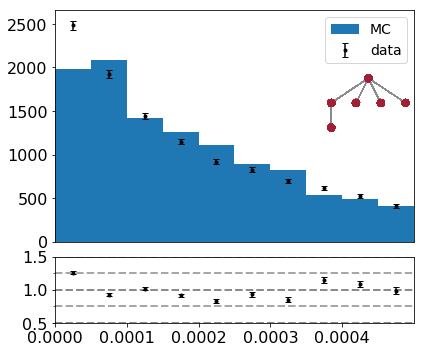

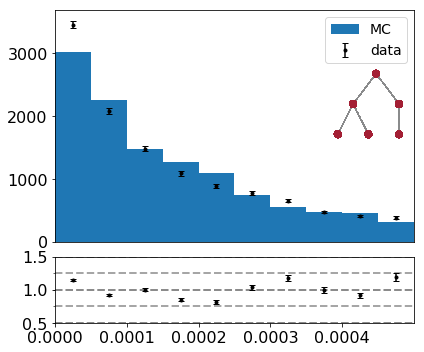

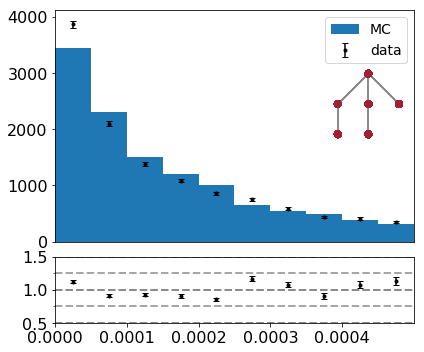

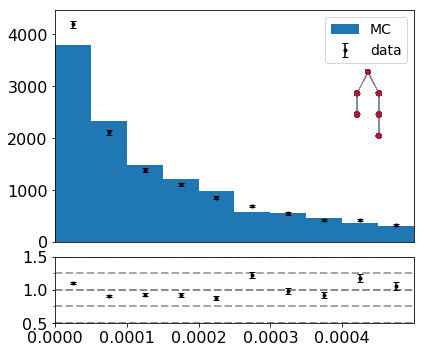

In [29]:
# 53

for i in range(49, 53):
    filename = 'newmc_res_' + str(i) + '.pkl'
    with open(filename) as f:
        mc = pickle.load(f)
    
    directory = 'basis_mc_newmc/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    fig, (ax, ax1) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3.5, 1]}, figsize=(6,5))

    bins = np.linspace(0, xlim[i], 11)
    bin_centres = (bins[:-1] + bins[1:])/2
    ax.set_xlim(0, xlim[i])
    ax1.set_xlim(0, xlim[i])
    ax1.set_ylim(0.5,1.5)
    
    plt.xticks(np.arange(0, xlim[i], xlim[i]/5))
    
    
#         for data
    data = results[i][np.logical_and(jetm >= jetm_lb[i], pttot<80)]
    counts, _ = np.histogram(data, bins)
    err = np.sqrt(counts)
    ax.errorbar(bin_centres, counts, yerr=np.sqrt(counts), fmt = '.k', capsize=3, label = "data")
#         for mc
    mc_counts, _ = np.histogram([], bins)
    for j in range(len(mc)):
        if mc_jetm[j] >= jetm_lb[i] and mc_pttot[j]<80:
            mc_counts_tmp, _ = np.histogram(mc[j], bins)
            for k in range(len(w_ev_head)):
                if k == len(w_ev_head)-1:
                    if j >= w_ev_head[k]:
                        w = weight[k]
                else:
                    if j >= w_ev_head[k] and j < w_ev_head[k+1]:
                        w = weight[k]
    #         print(w)
            mc_counts_tmp = np.multiply(mc_counts_tmp, w)
            mc_counts = np.add(mc_counts, mc_counts_tmp)
#     mc = mc_res[np.logical_and.reduce((mc_jetm >= jetm_lb[i], mc_pttot<80))]
#     mc_counts, _ = np.histogram(mc, bins)
    scaled_mc = counts.sum()/mc_counts.sum()*mc_counts
    ax.hist(bin_centres, weights = scaled_mc, bins = bins, label = "MC")
    ax.axes.get_xaxis().set_visible(False)
    
    ax.legend(prop={'size': 14}, loc='upper right')
#     adding stuff
#     mean = "{:.2e}".format(mean)
#     mc_mean = "{:.2e}".format(mc_mean)
#     plt.figtext(.96, .9, 'mean(data)='+ mean, fontsize = 16, ha = 'right')
#     plt.figtext(.96, .85, 'mean(mc)='+ mc_mean, fontsize = 16, ha = 'right')
#     plt.figtext(.55, .73, 'd='+str(deg), fontsize = 16)
    plt.tight_layout()
    im = plt.imread('graphs/' + str(i) + '.png')
    newax = fig.add_axes([0.76, .6, 0.2, 0.2], zorder=1)
    newax.imshow(im)
    newax.axis('off')
#     ratio
    counts = counts.astype(float)
    ratio = np.divide(counts, scaled_mc, out=np.zeros_like(counts), where = scaled_mc!=0)
    ratio_err = np.divide(err, scaled_mc, out=np.zeros_like(counts), where = scaled_mc!=0)
    ax1.errorbar(bin_centres, ratio, yerr = ratio_err, fmt = '.k', capsize=3)
    ax1.set_yticks(np.arange(0.5, 1.5, 0.25), minor=True)
    ax1.grid(color='grey', linestyle='--', linewidth=2, axis='y', alpha=0.7, which='both')
    plt.subplots_adjust(hspace = 0.1)
    
    plt.savefig(directory + str(i) + '.png', dpi = 300)
# 
    plt.show()

    plt.close('all')

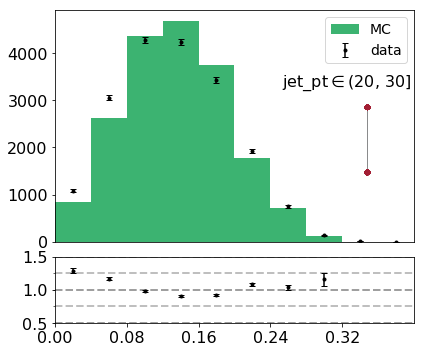

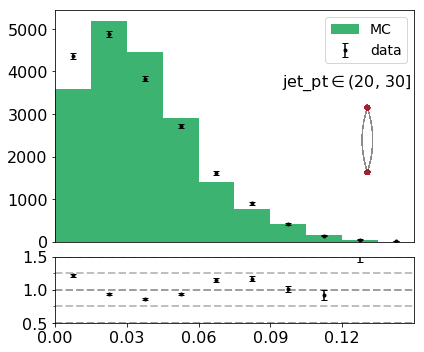

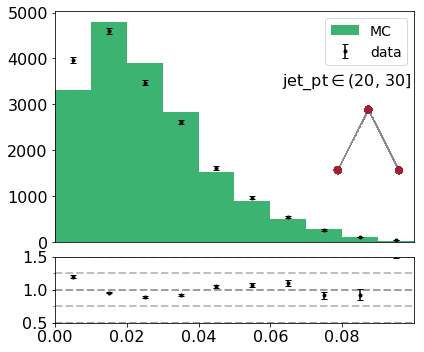

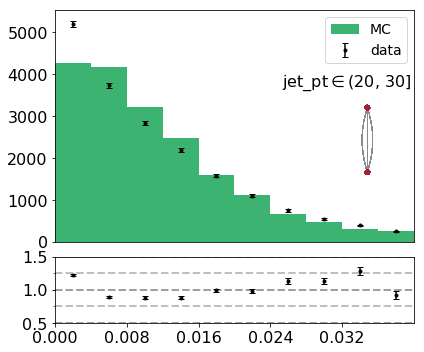

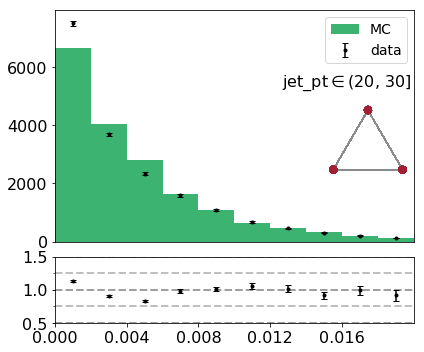

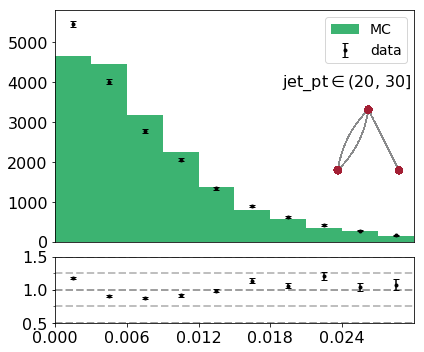

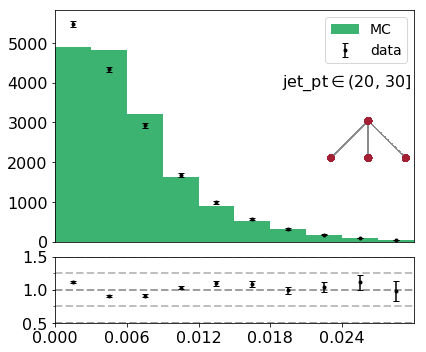

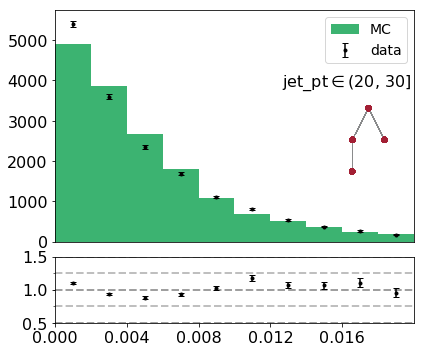

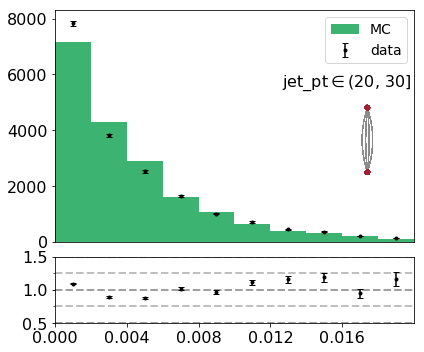

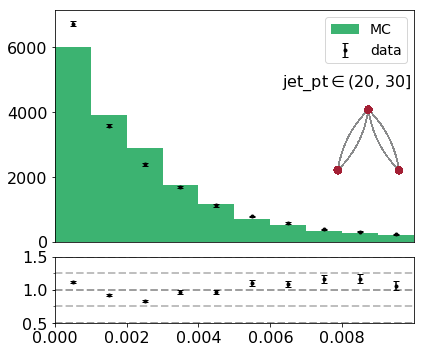

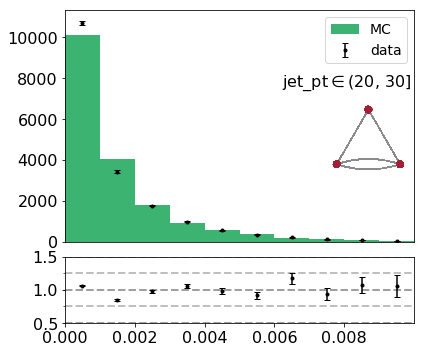

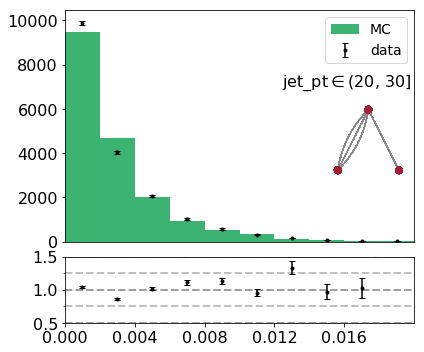

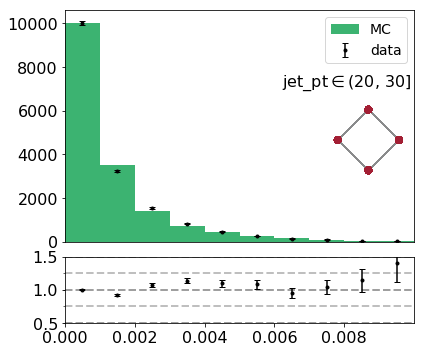

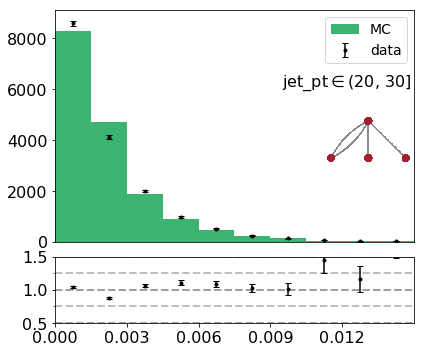

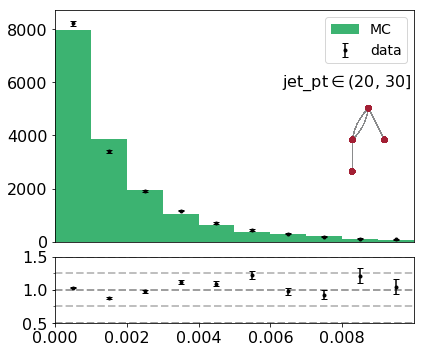

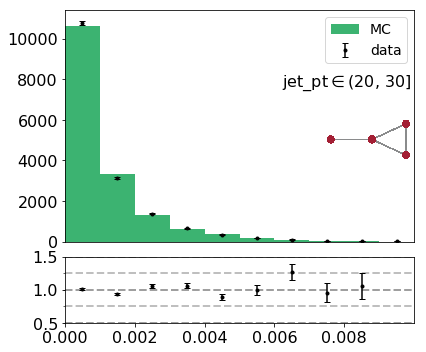

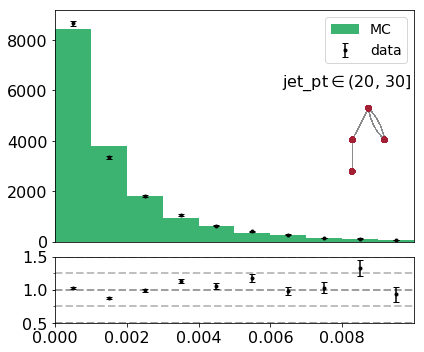

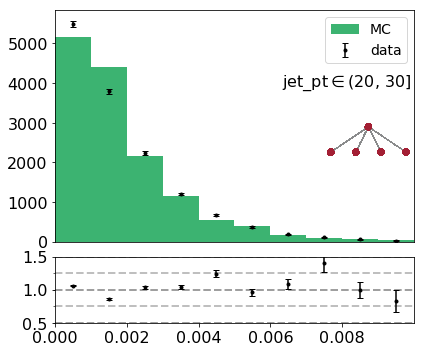

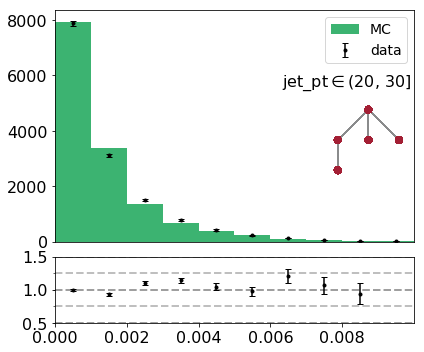

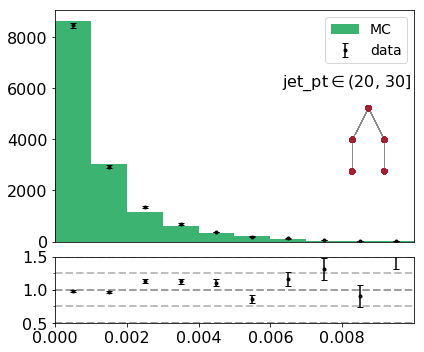

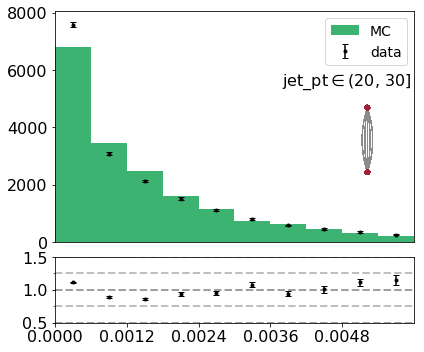

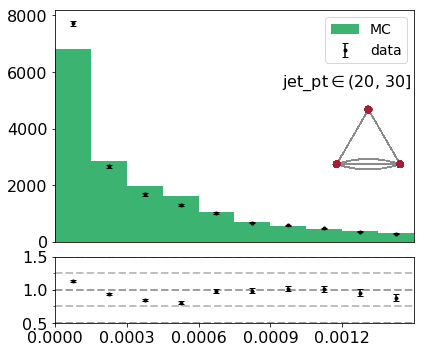

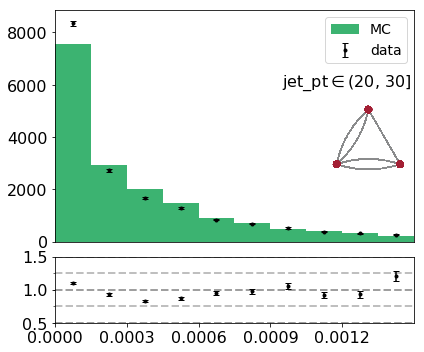

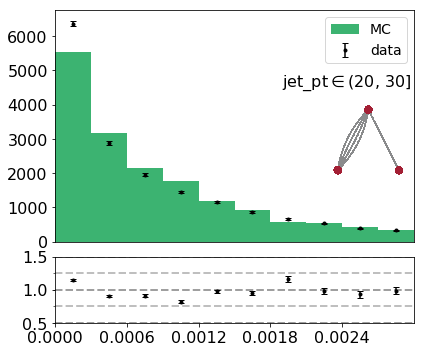

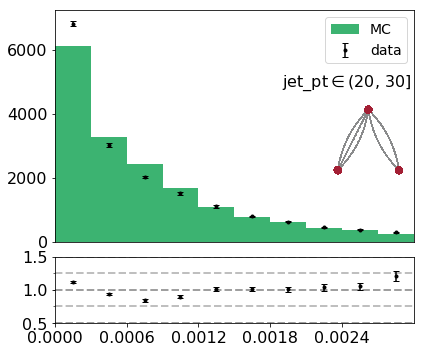

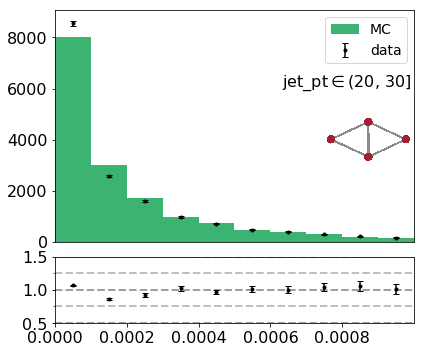

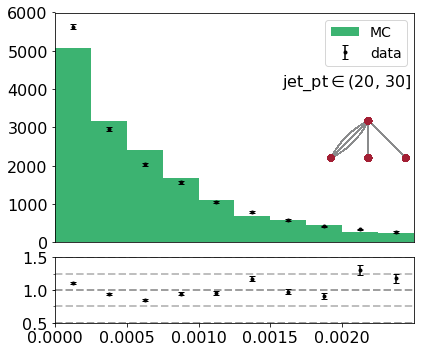

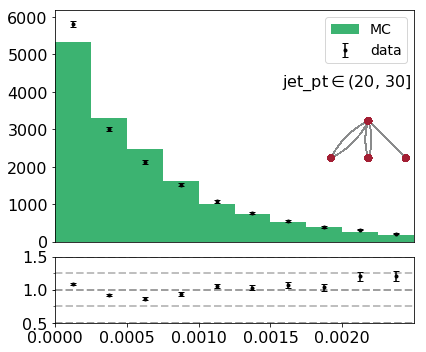

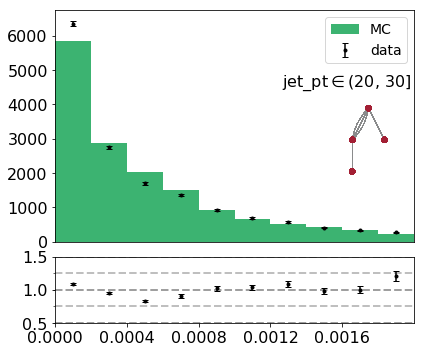

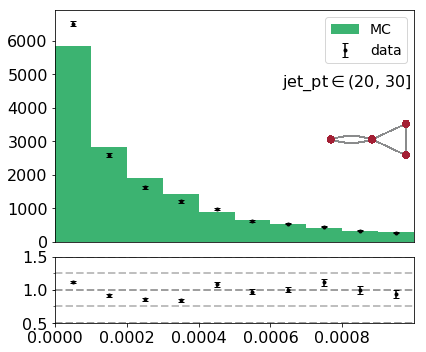

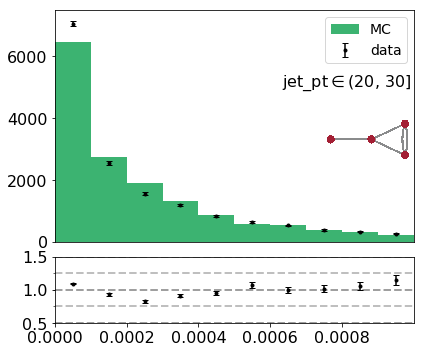

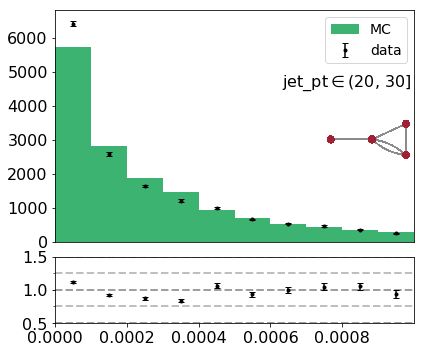

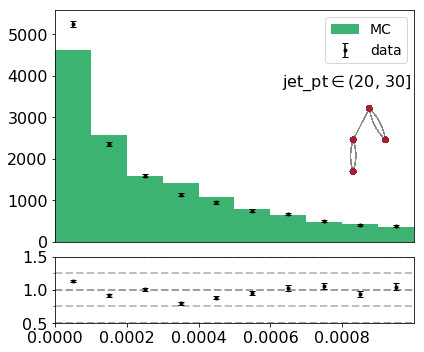

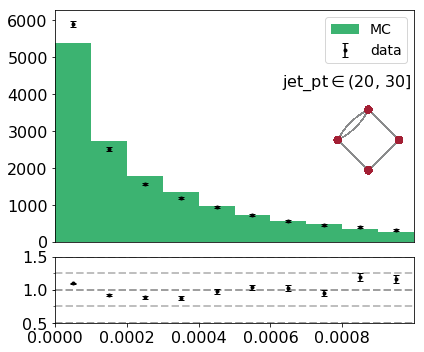

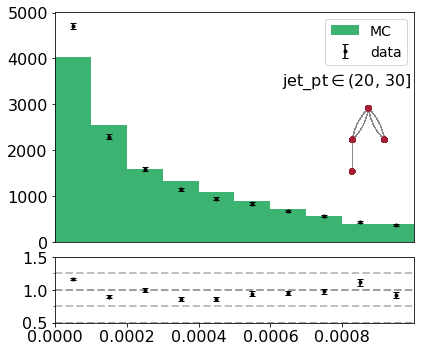

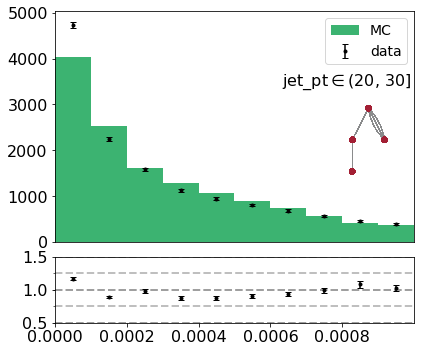

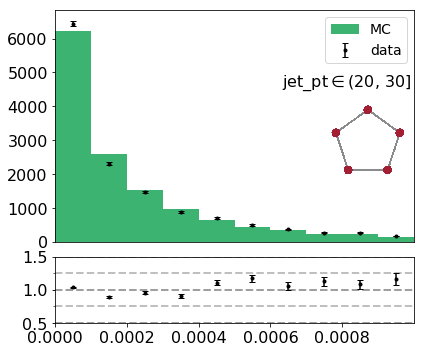

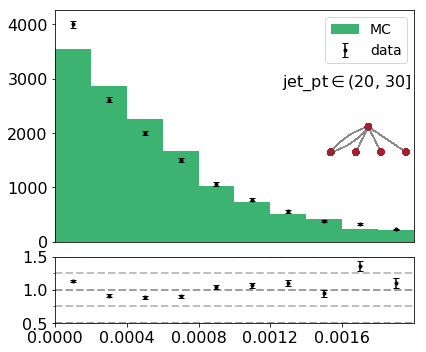

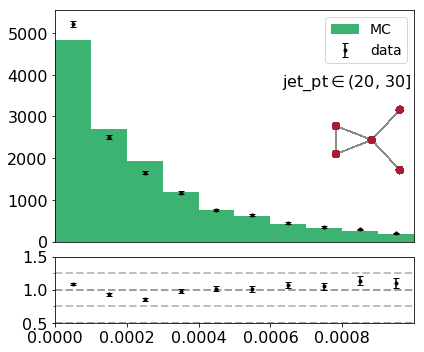

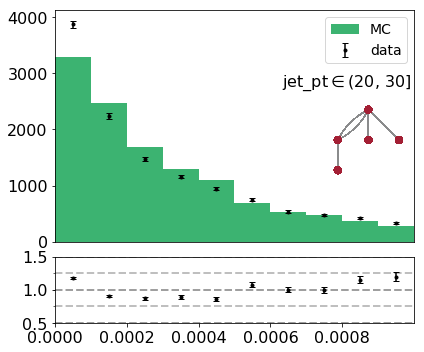

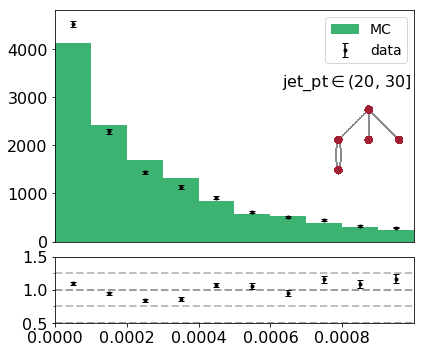

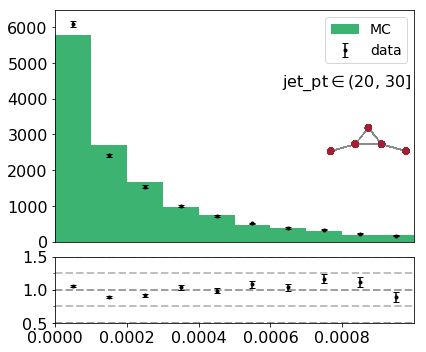

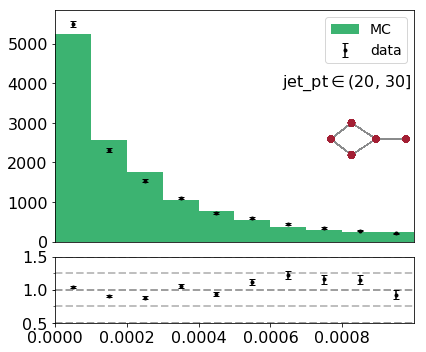

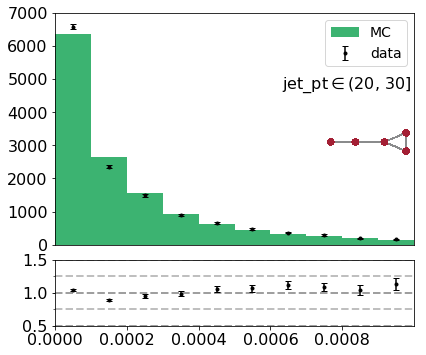

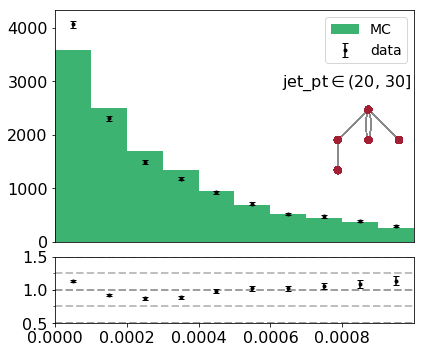

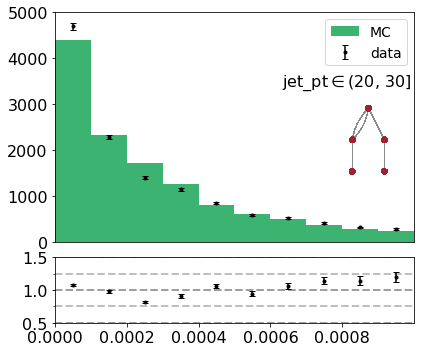

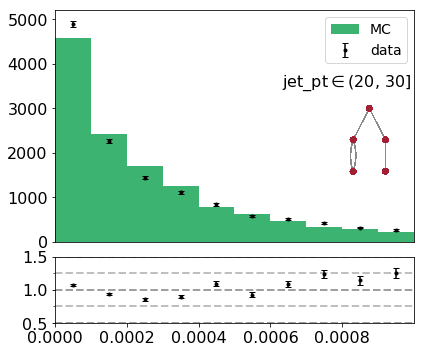

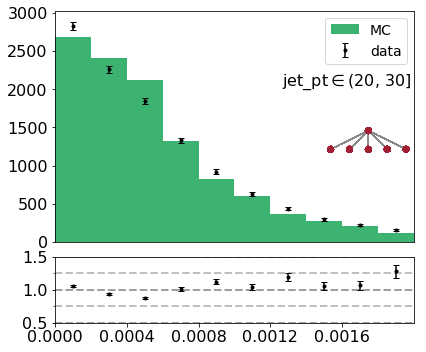

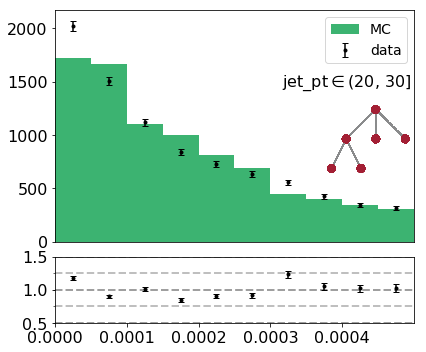

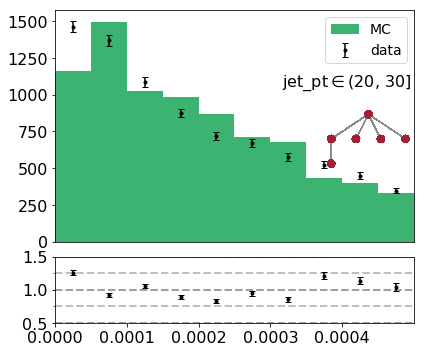

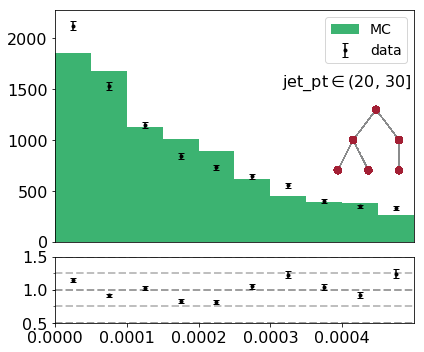

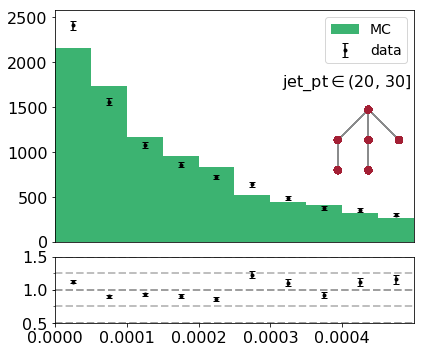

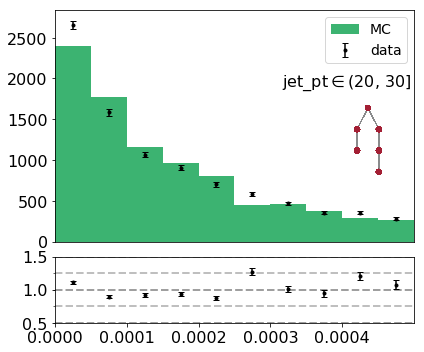

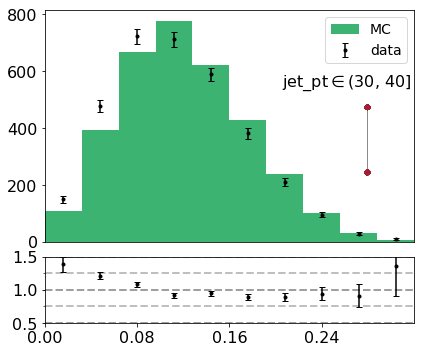

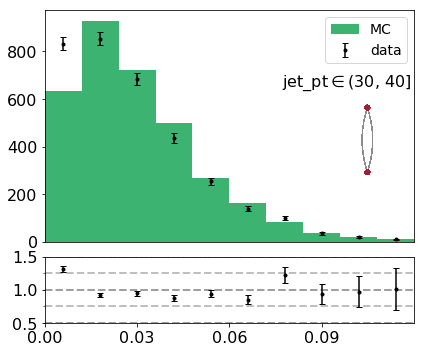

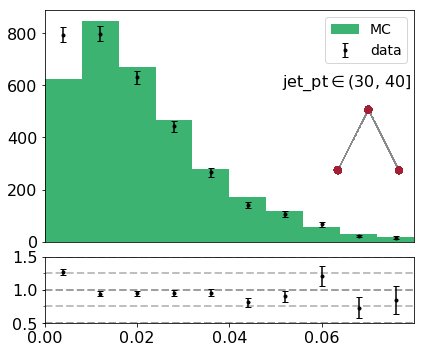

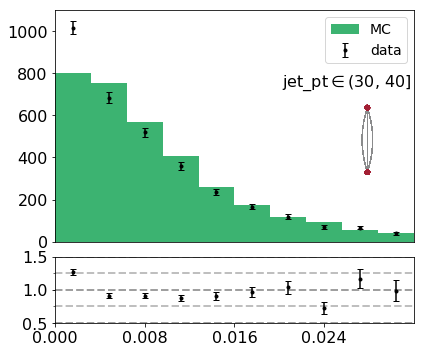

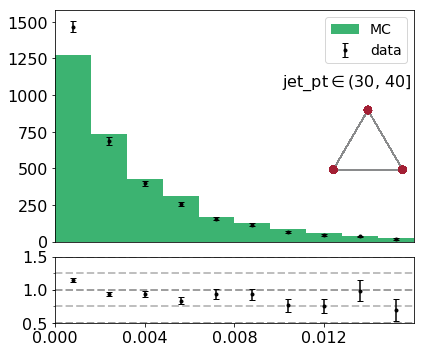

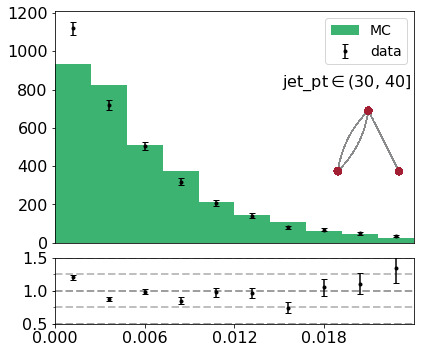

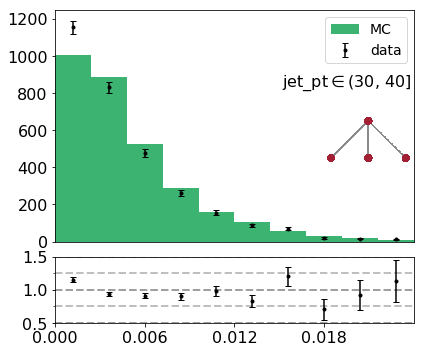

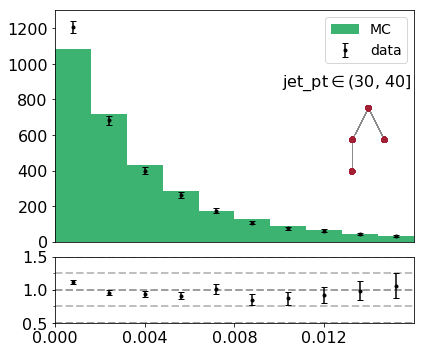

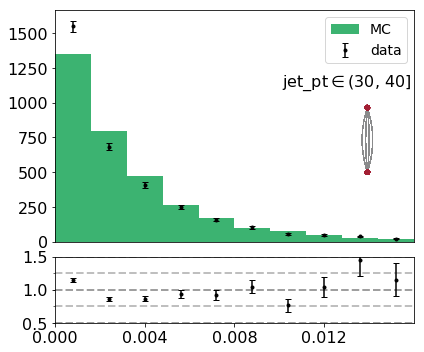

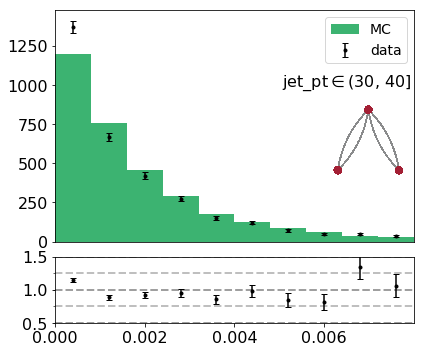

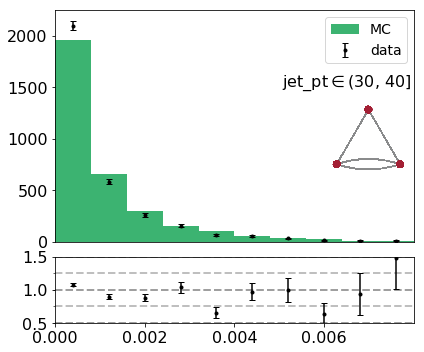

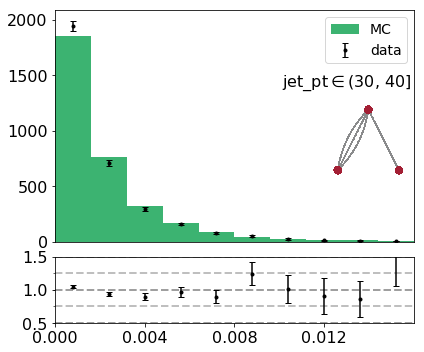

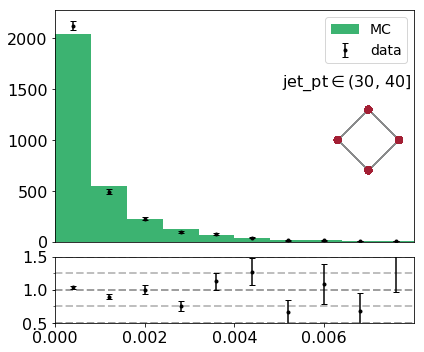

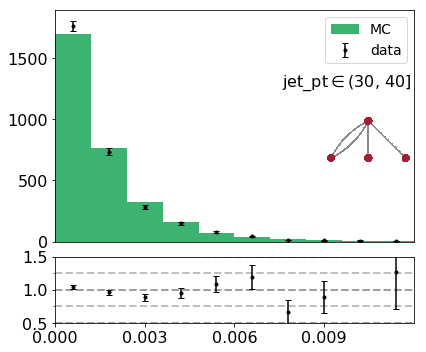

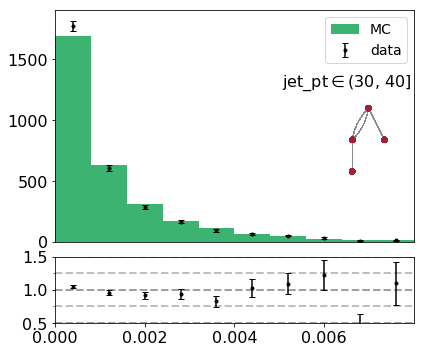

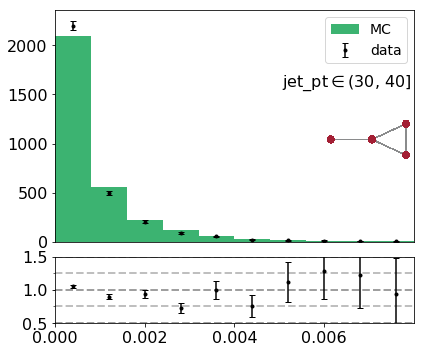

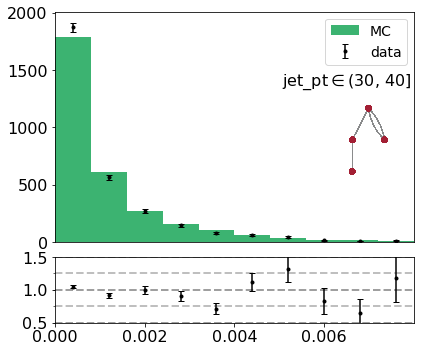

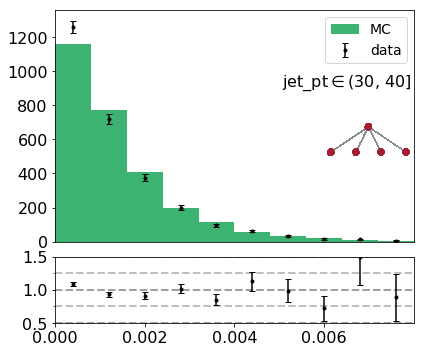

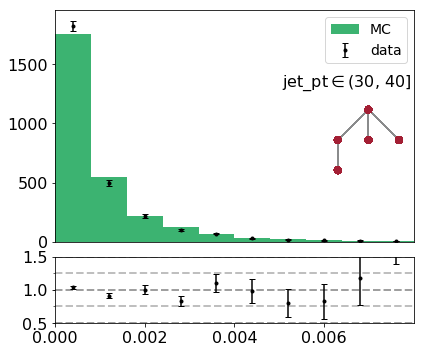

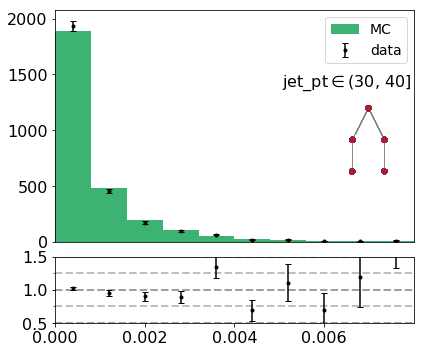

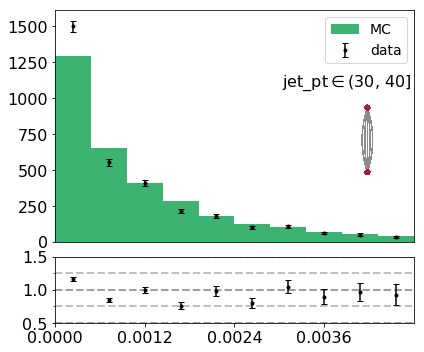

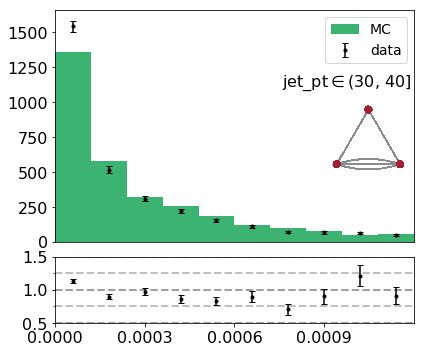

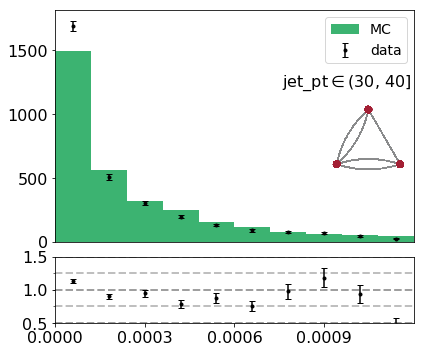

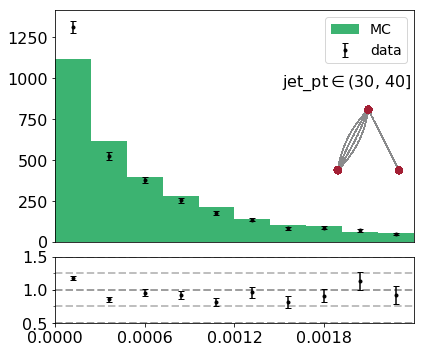

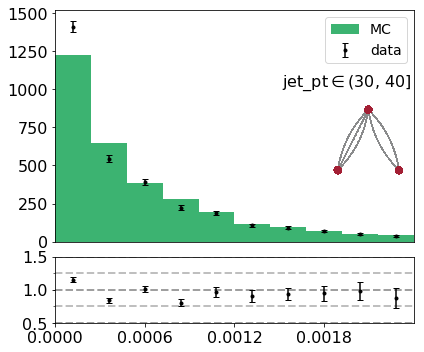

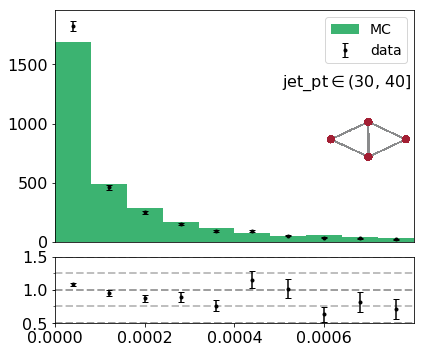

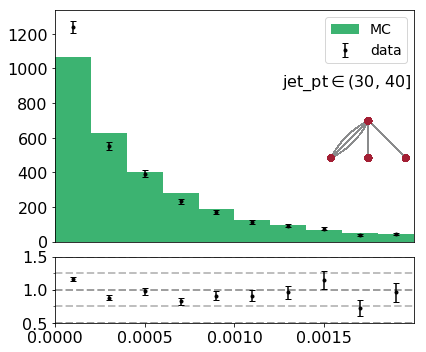

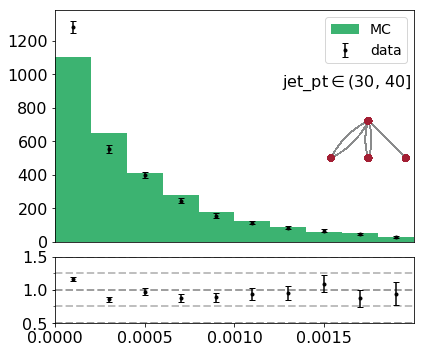

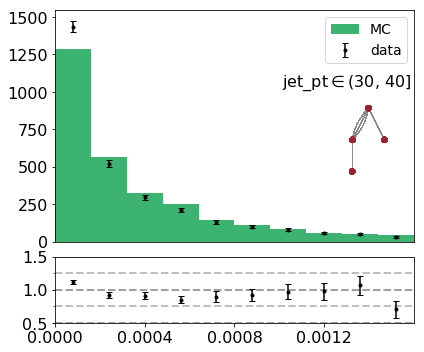

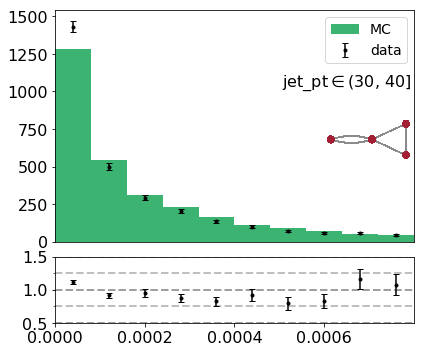

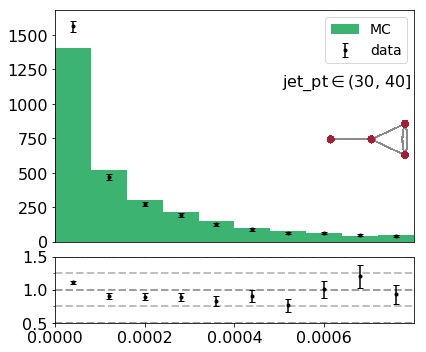

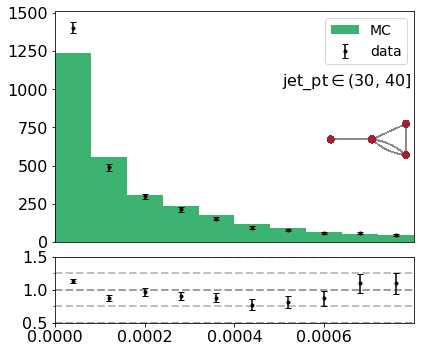

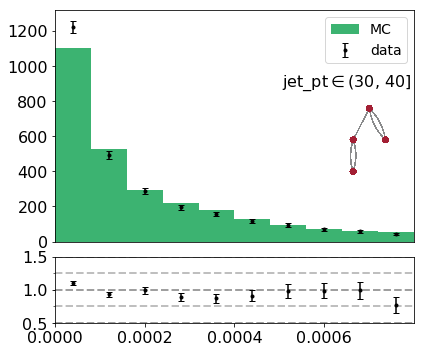

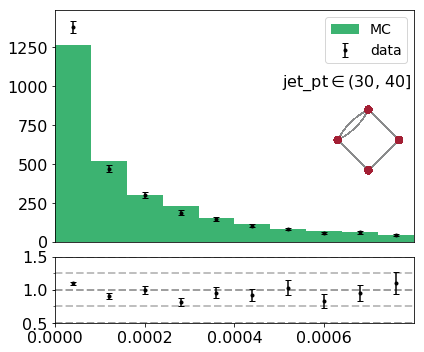

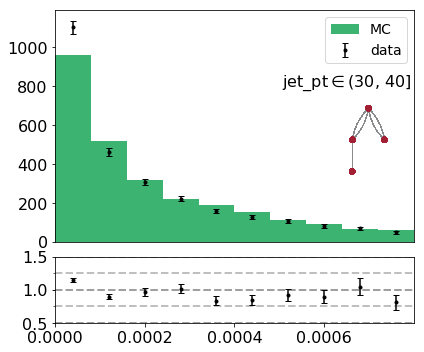

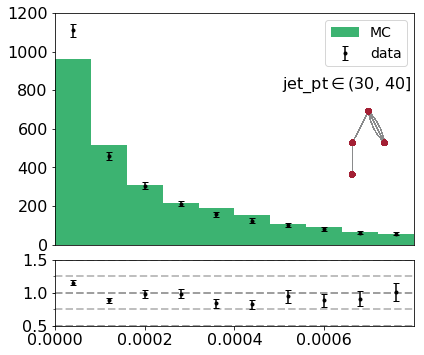

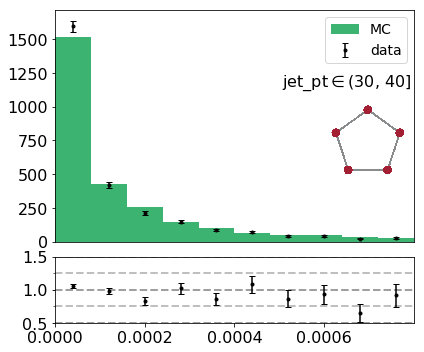

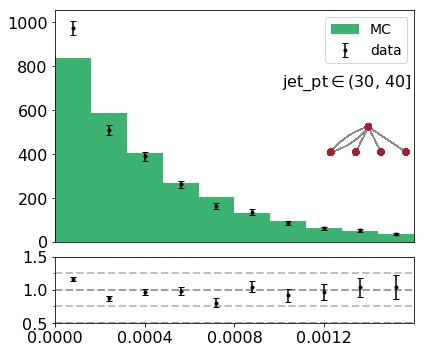

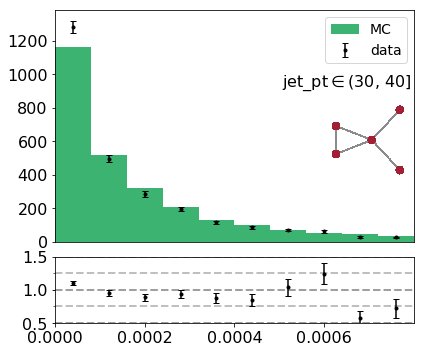

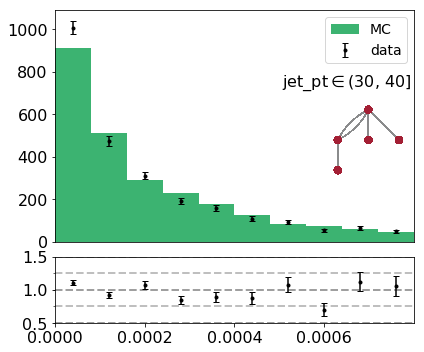

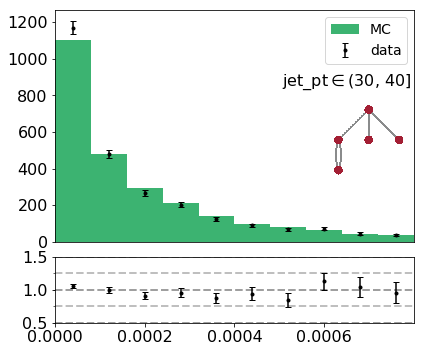

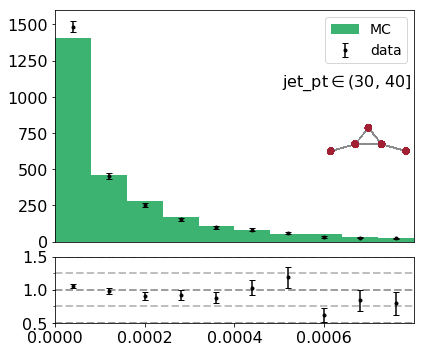

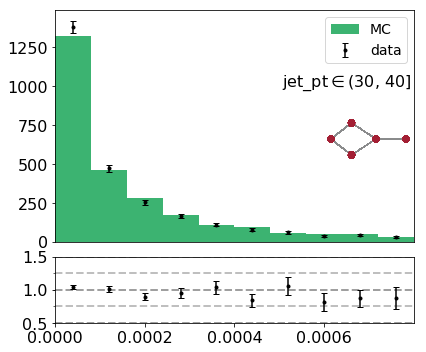

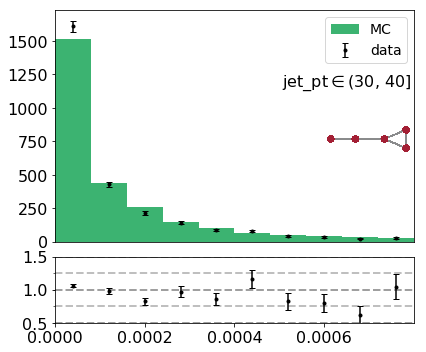

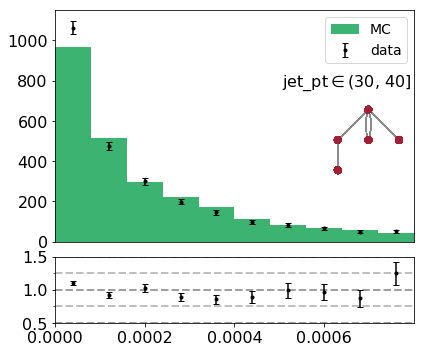

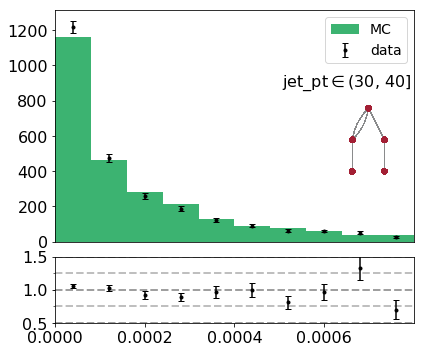

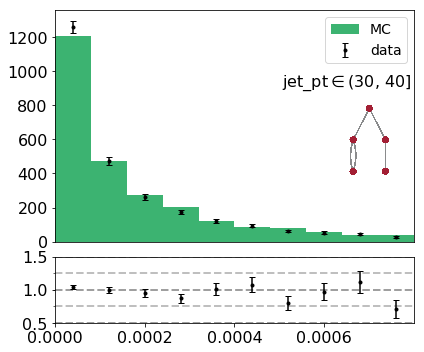

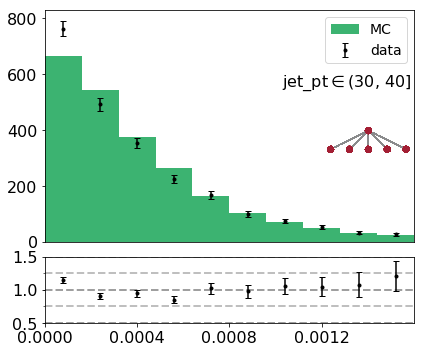

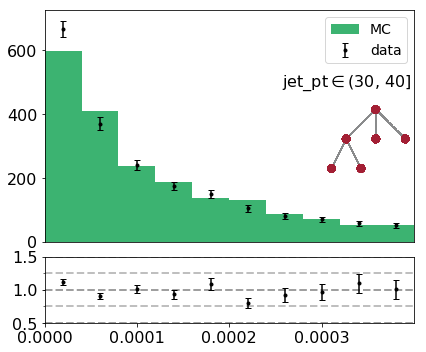

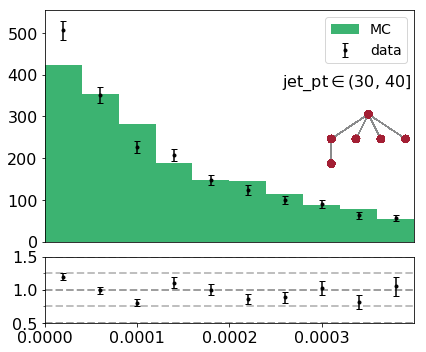

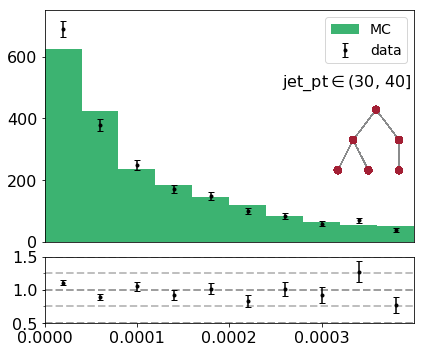

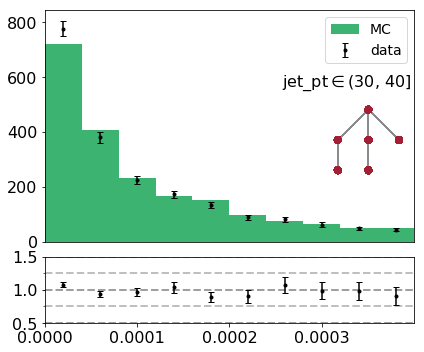

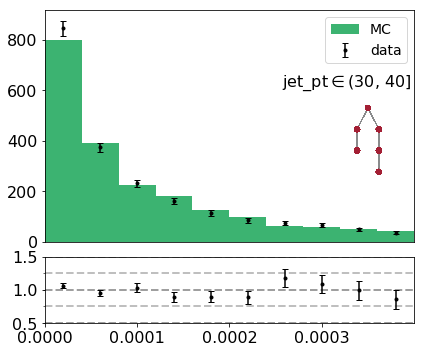

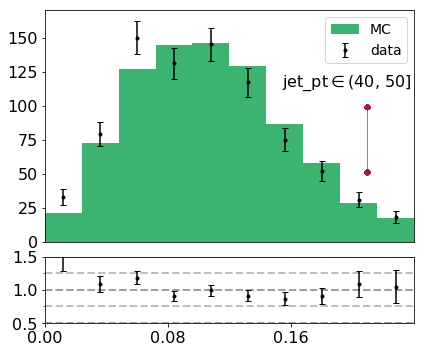

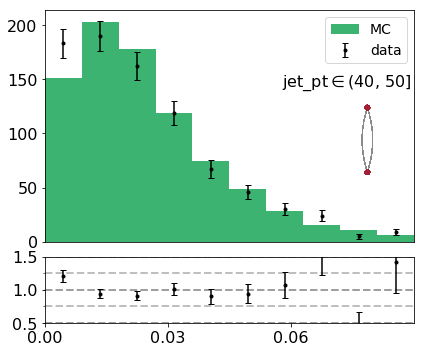

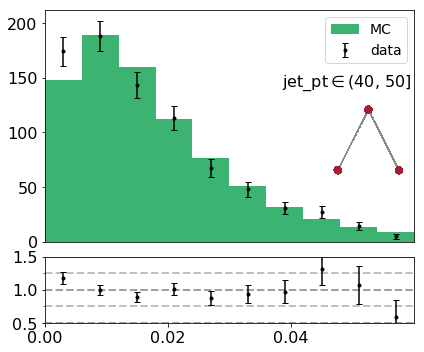

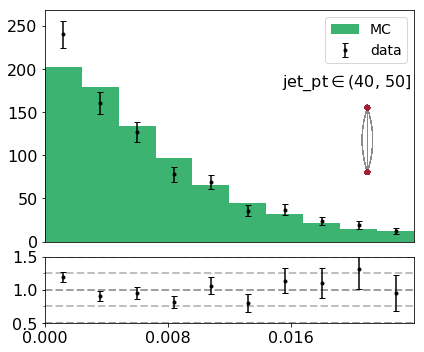

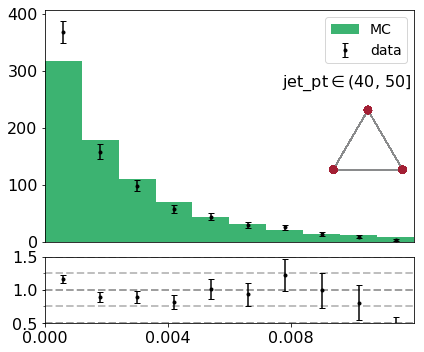

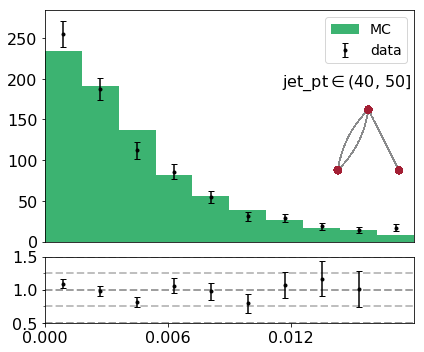

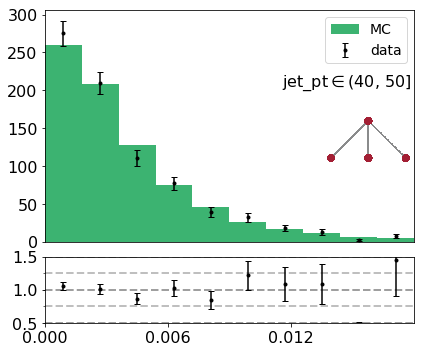

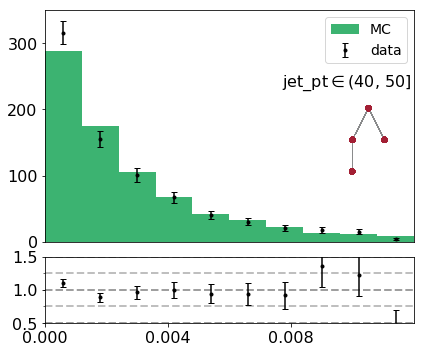

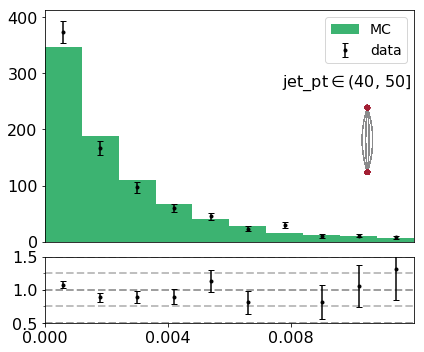

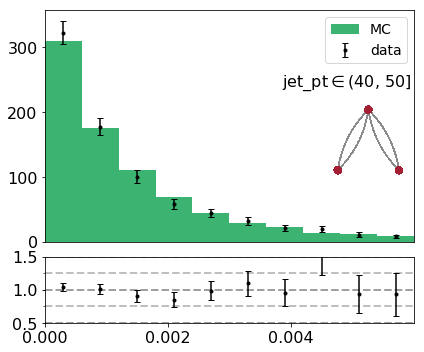

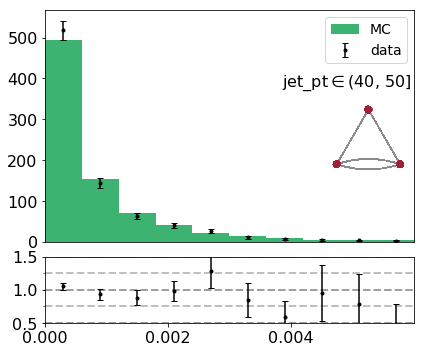

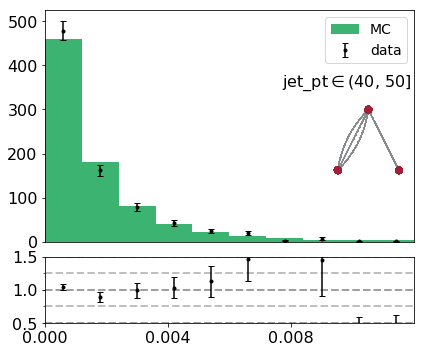

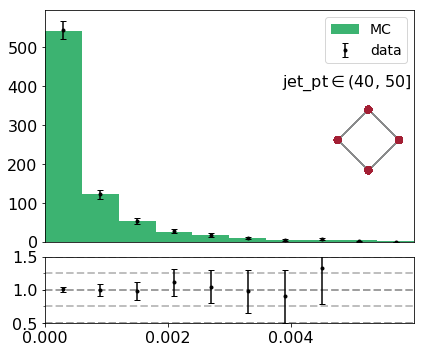

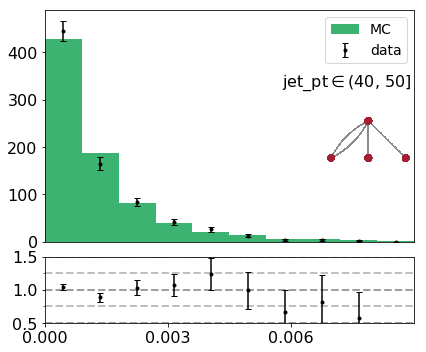

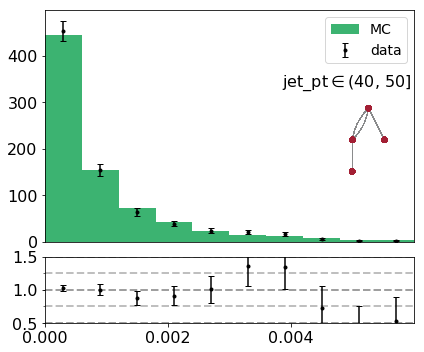

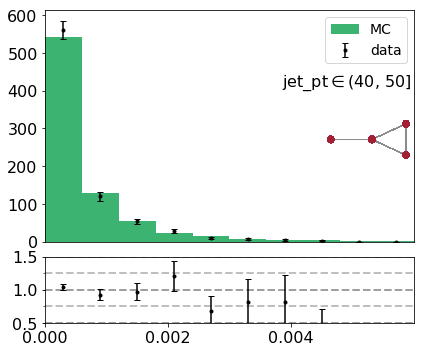

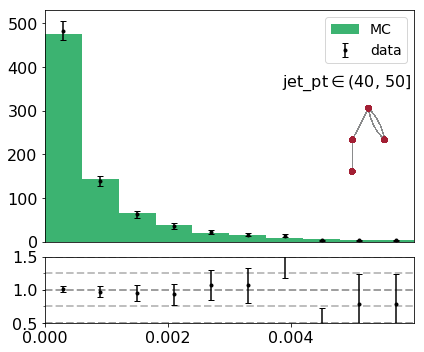

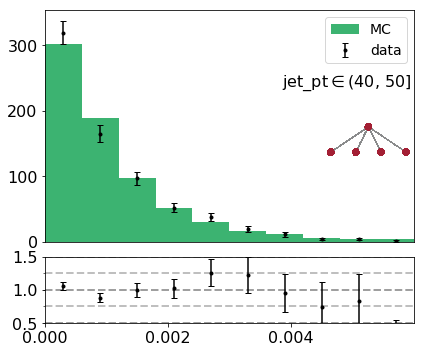

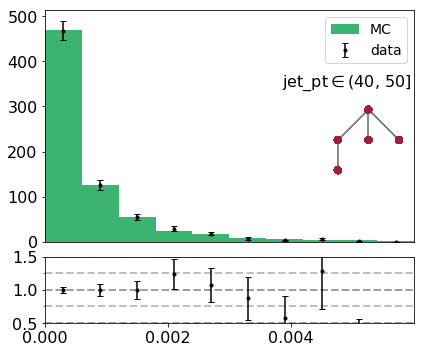

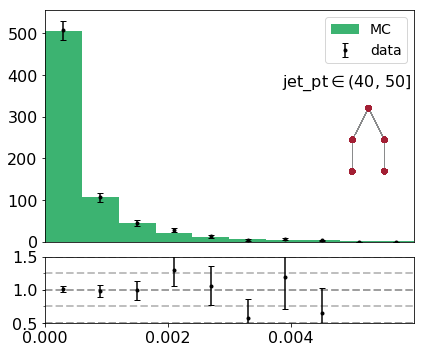

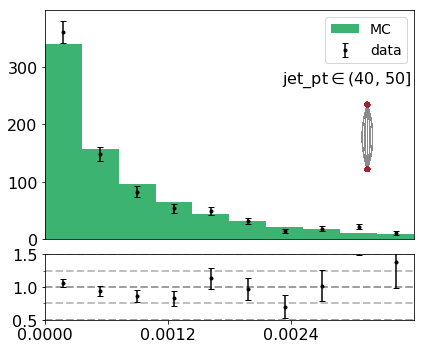

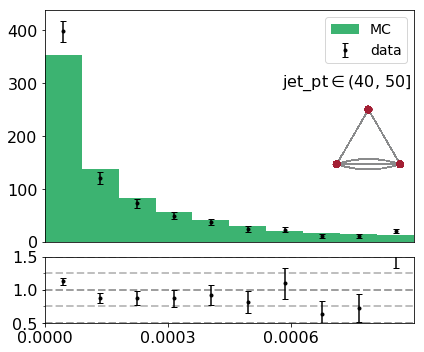

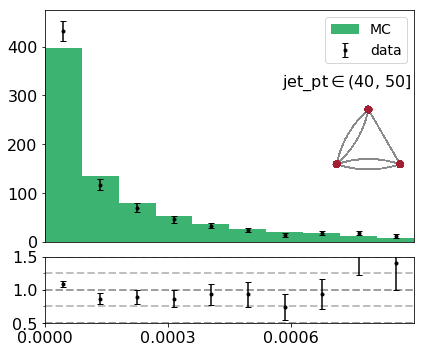

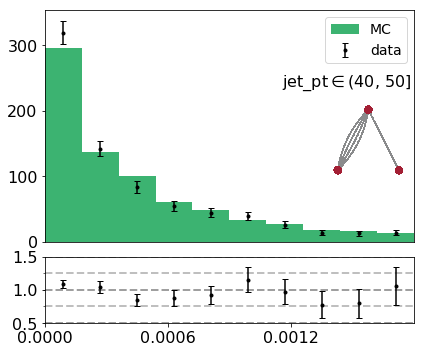

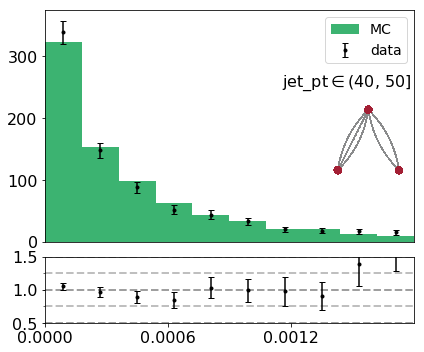

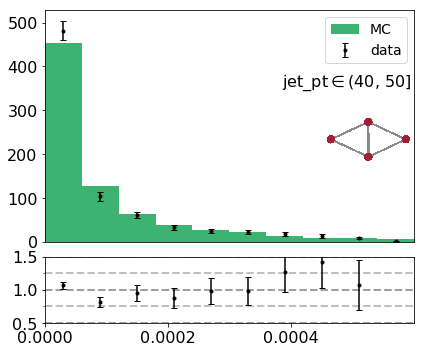

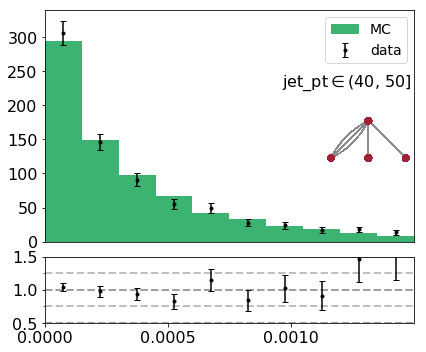

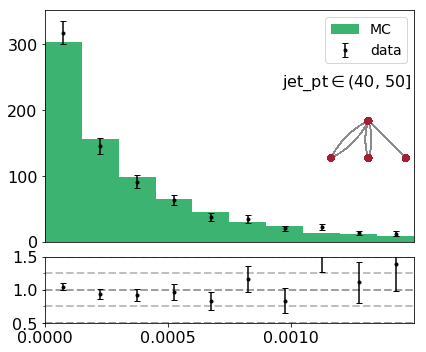

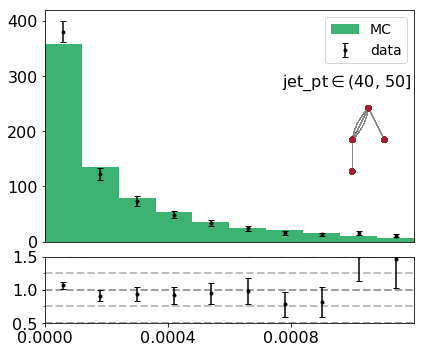

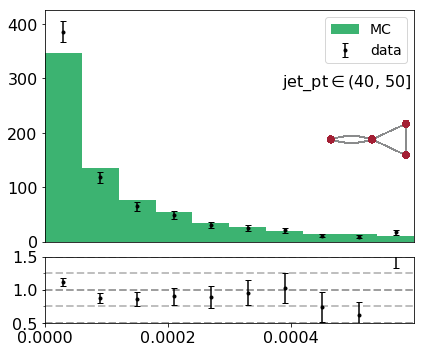

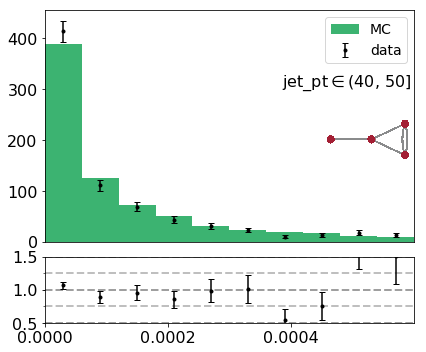

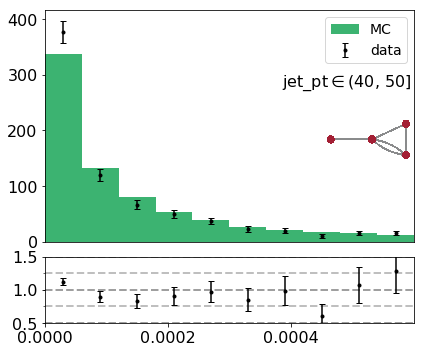

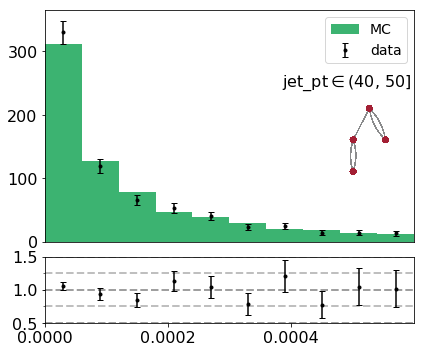

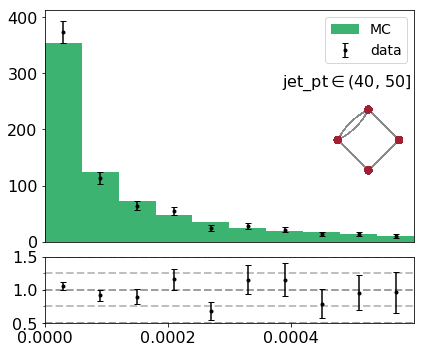

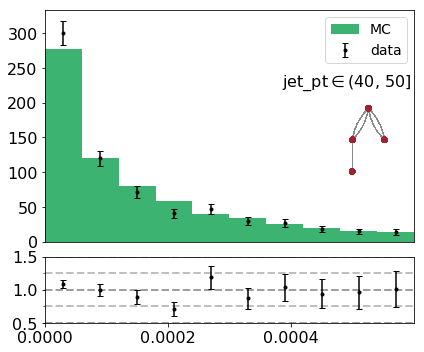

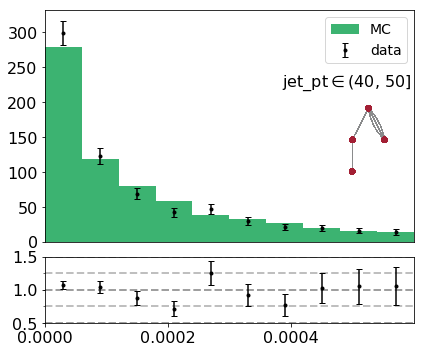

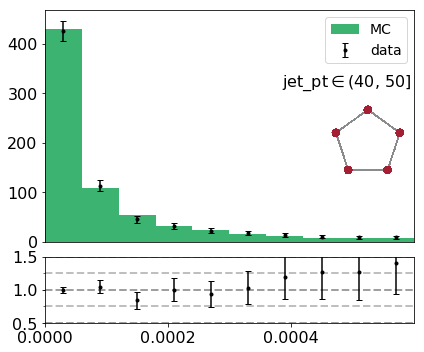

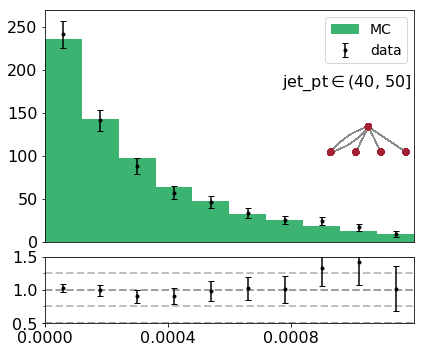

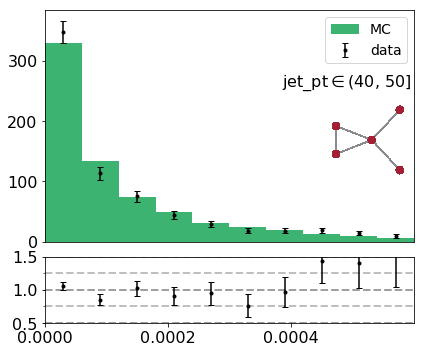

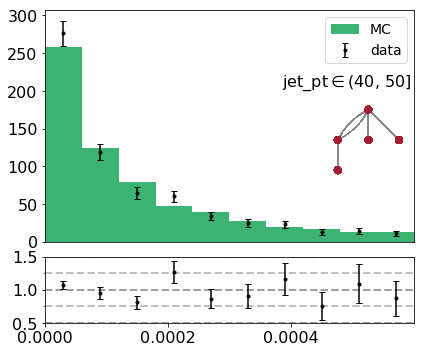

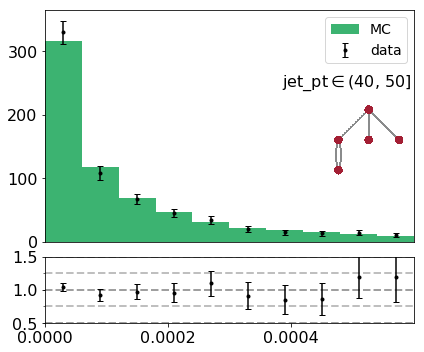

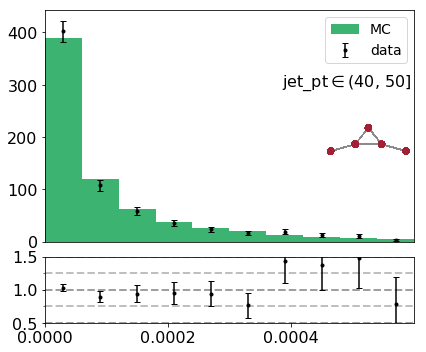

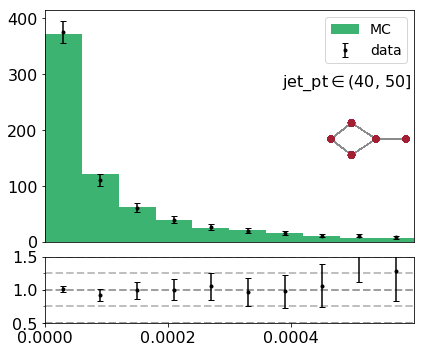

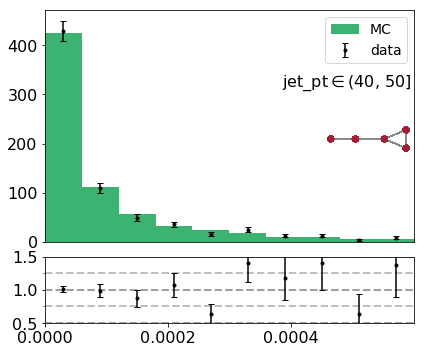

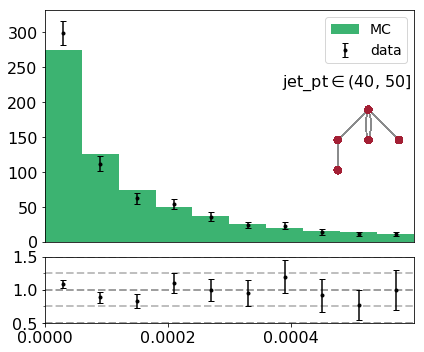

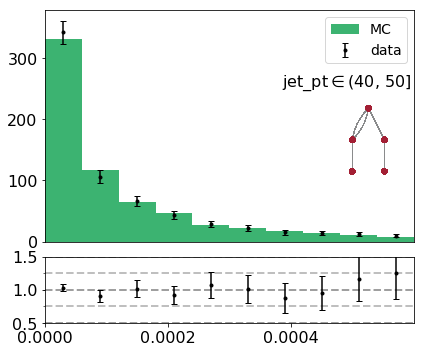

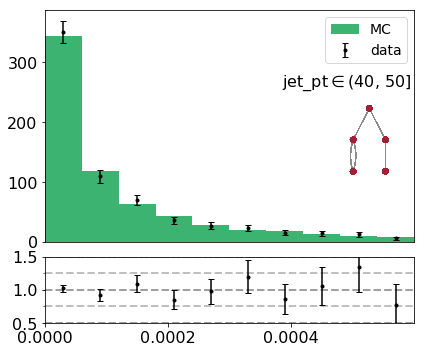

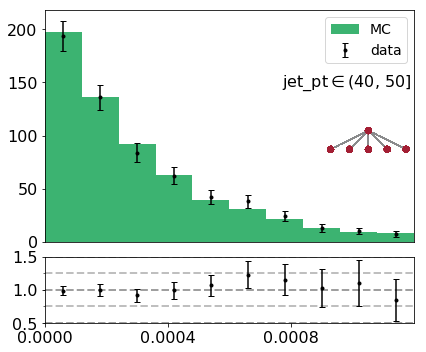

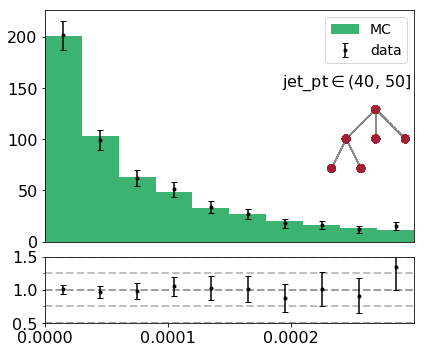

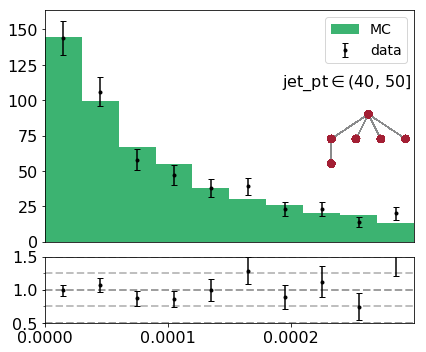

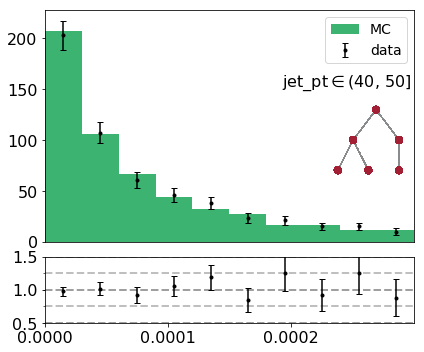

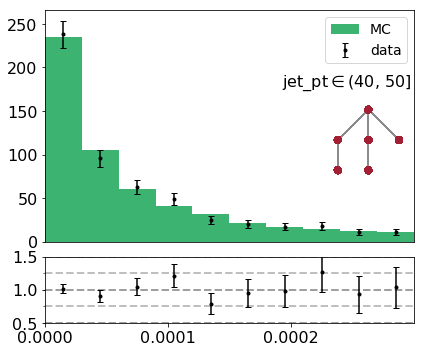

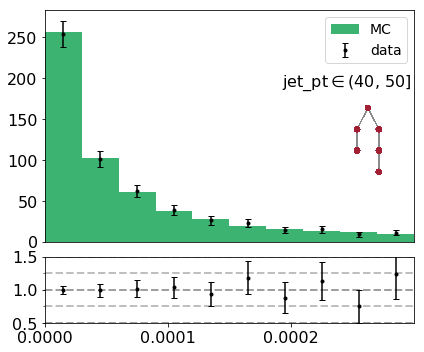

In [28]:
for j in range(3) :
    for i in range(53):
        filename = 'newmc_res_' + str(i) + '.pkl'
        with open(filename) as f:
            mc = pickle.load(f)
        
        lowlim = 20 + 10*j
        uplim = 20 + 10*(j+1)

        
        directory = 'basis_mc_pt_newmc/' + str(j) + '/'
        if not os.path.exists(directory):
            os.makedirs(directory)

        fig, (ax, ax1) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3.5, 1]}, figsize=(6,5))


        bins = np.linspace(0, xlim[i]*(1-j*0.2), 11)
        bin_centres = (bins[:-1] + bins[1:])/2
        plt.xlim(0, xlim[i]*(1-j*0.2))
        ax.set_xlim(0, xlim[i]*(1-j*0.2))
        ax1.set_xlim(0, xlim[i]*(1-j*0.2))
        ax1.set_ylim(0.5,1.5)
        plt.xticks(np.arange(0, xlim[i]*(1-j*0.2), xlim[i]*(1-j*0.2)/(5-j)))
        
#         for data
        data = results[i][np.logical_and.reduce((pttot > lowlim, pttot <= uplim, jetm >= jetm_lb[i]))]
        counts, _ = np.histogram(data, bins)
        err = np.sqrt(counts)
        ax.errorbar(bin_centres, counts, yerr=np.sqrt(counts), fmt = '.k', capsize=3, label = "data")

    #         for mc
        mc_counts, _ = np.histogram([], bins)
        for l in range(len(mc)):
            if mc_jetm[l] >= jetm_lb[i] and mc_pttot[l]<=uplim and mc_pttot[l] > lowlim:
                mc_counts_tmp, _ = np.histogram(mc[l], bins)
                for k in range(len(w_ev_head)):
                    if k == len(w_ev_head)-1:
                        if l >= w_ev_head[k]:
                            w = weight[k]
                    else:
                        if l >= w_ev_head[k] and l < w_ev_head[k+1]:
                            w = weight[k]
        #         print(w)
                mc_counts_tmp = np.multiply(mc_counts_tmp, w)
                mc_counts = np.add(mc_counts, mc_counts_tmp)
        scaled_mc = counts.sum()/mc_counts.sum()*mc_counts    
        
        
#         for mc
#         mc = mc_results[i][np.logical_and.reduce((mc_pttot > lowlim, mc_pttot <= uplim, mc_jetm >= jetm_lb[i]))]
#         weight_pt = weight[np.logical_and.reduce((mc_pttot > lowlim, mc_pttot <= uplim, mc_jetm >= jetm_lb[i]))]
#         mc_counts, _ = np.histogram(mc, bins, weights = weight_pt)
#         scaled_mc = len(data)/float(len(mc))*mc_counts
        ax.hist(bin_centres, weights = scaled_mc, bins = bins, color = "mediumseagreen", label = "MC")
        ax.axes.get_xaxis().set_visible(False)
        ax.legend(prop={'size': 14}, loc='upper right')
#         adding stuff
#         plt.figtext(.96, .9, 'mean(data)='+ mean, fontsize = 16, ha = 'right')
#         plt.figtext(.96, .85, 'mean(mc)='+ mc_mean, fontsize = 16, ha = 'right')
#         plt.figtext(.5, .80, 'd='+str(deg), fontsize = 18)
        plt.figtext(.96, .75, r'jet_pt$\in$(' + str(lowlim) + ', '+str(uplim)+']', fontsize = 16, ha = 'right')
        plt.tight_layout()
        im = plt.imread('graphs/' + str(i) + '.png')
        newax = fig.add_axes([0.76, .50, 0.2, 0.2], zorder=1)
        newax.imshow(im)
        newax.axis('off')
#         ratio
        counts = counts.astype(float)
        ratio = np.divide(counts, scaled_mc, out=np.zeros_like(counts), where = scaled_mc!=0)
        ratio_err = np.divide(err, scaled_mc, out=np.zeros_like(counts), where = scaled_mc!=0)
        ax1.errorbar(bin_centres, ratio, yerr = ratio_err, fmt = '.k', capsize=3)
        ax1.set_yticks(np.arange(0.5, 1.5, 0.25), minor=True)
        ax1.grid(color='grey', linestyle='--', linewidth=2, axis='y', alpha=0.5, which='both')
        plt.subplots_adjust(hspace = 0.1)
        
        plt.savefig(directory + str(i) + '.png', dpi = 300)

        plt.show()

        plt.close('all')